## Import libraries

In [43]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from missforest import MissForest
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor #pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt

## 0.0 - Load the data  

In [44]:
df = pd.read_csv(r"/workspaces/carlossuesc95-intro-ml/data/raw/internal-link (campaing  bank ).csv", sep=';')
pd.set_option('display.max_columns', None)
df.head().T.merge(df.dtypes.rename('dtypes'), how='left', left_index=True, right_index=True)

,0,1,2,3,4,dtypes
age,56,57,37,40,56,int64
job,housemaid,services,services,admin.,services,object
marital,married,married,married,married,married,object
education,basic.4y,high.school,high.school,basic.6y,high.school,object
default,no,unknown,no,no,no,object
housing,no,no,yes,no,no,object
loan,no,no,no,no,yes,object
contact,telephone,telephone,telephone,telephone,telephone,object
month,may,may,may,may,may,object
day_of_week,mon,mon,mon,mon,mon,object


## 0.1 -Analisis de los datos, saber que hay que eliminar y que no 

-Eliminación de columnas con valores constantes.
	-Eliminación de filas y columnas duplicadas.
	-Eliminar columnas redundantes.
	-Eliminar columnas que filtren datos o que no tendremos a la hora de realizar la predicción.
	-Estudiar patrones en los datos faltantes.
	-Eliminar columnas con más de un 40% de valores faltantes si procede (depende del contexto de negocio).
	-Eliminar filas con alto número de columnas con valores faltantes.
	-Extraer características.

## 1.0- Elimimación:
- 
No podemos extraer ninguna carecteristica de estos valores 

> ### 1.1 Valores constantes

In [45]:
unicos = df.nunique()
df[unicos[unicos==1].index]
df.drop(unicos[unicos==1].index, axis=1, inplace=True)

unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

### parece que no hay valores constantes
cuantos valores diferentes hay por cada columna 

In [ ]:
porcentaje_unicos = (df.nunique() / len(df)) * 100
porcentaje_unicos.sort_values(ascending=False)

## Valored redundantes
no hay valores redundantes

In [7]:
# VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df.select_dtypes(include=[np.number]).columns
vif_data["VIF"] = [variance_inflation_factor(df.select_dtypes(include=[np.number]).values, i) for i in range(len(vif_data["feature"]))]

## Eliminamos duplicados 

In [15]:
df_duplicados = df[df.duplicated()]
df_duplicados
df.duplicated(keep=False)


0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

No hay valores duplicados 

## En el analisis del df, Observamos que hay columnas con valores Unknow,nonexistent, que habra que eliminar, valores categoricos que hay que codificar

In [48]:
df= df.replace(['unknown','nonexistent'], np.nan , inplace=True)
df

AttributeError: 'NoneType' object has no attribute 'replace'

In [50]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

<Axes: >

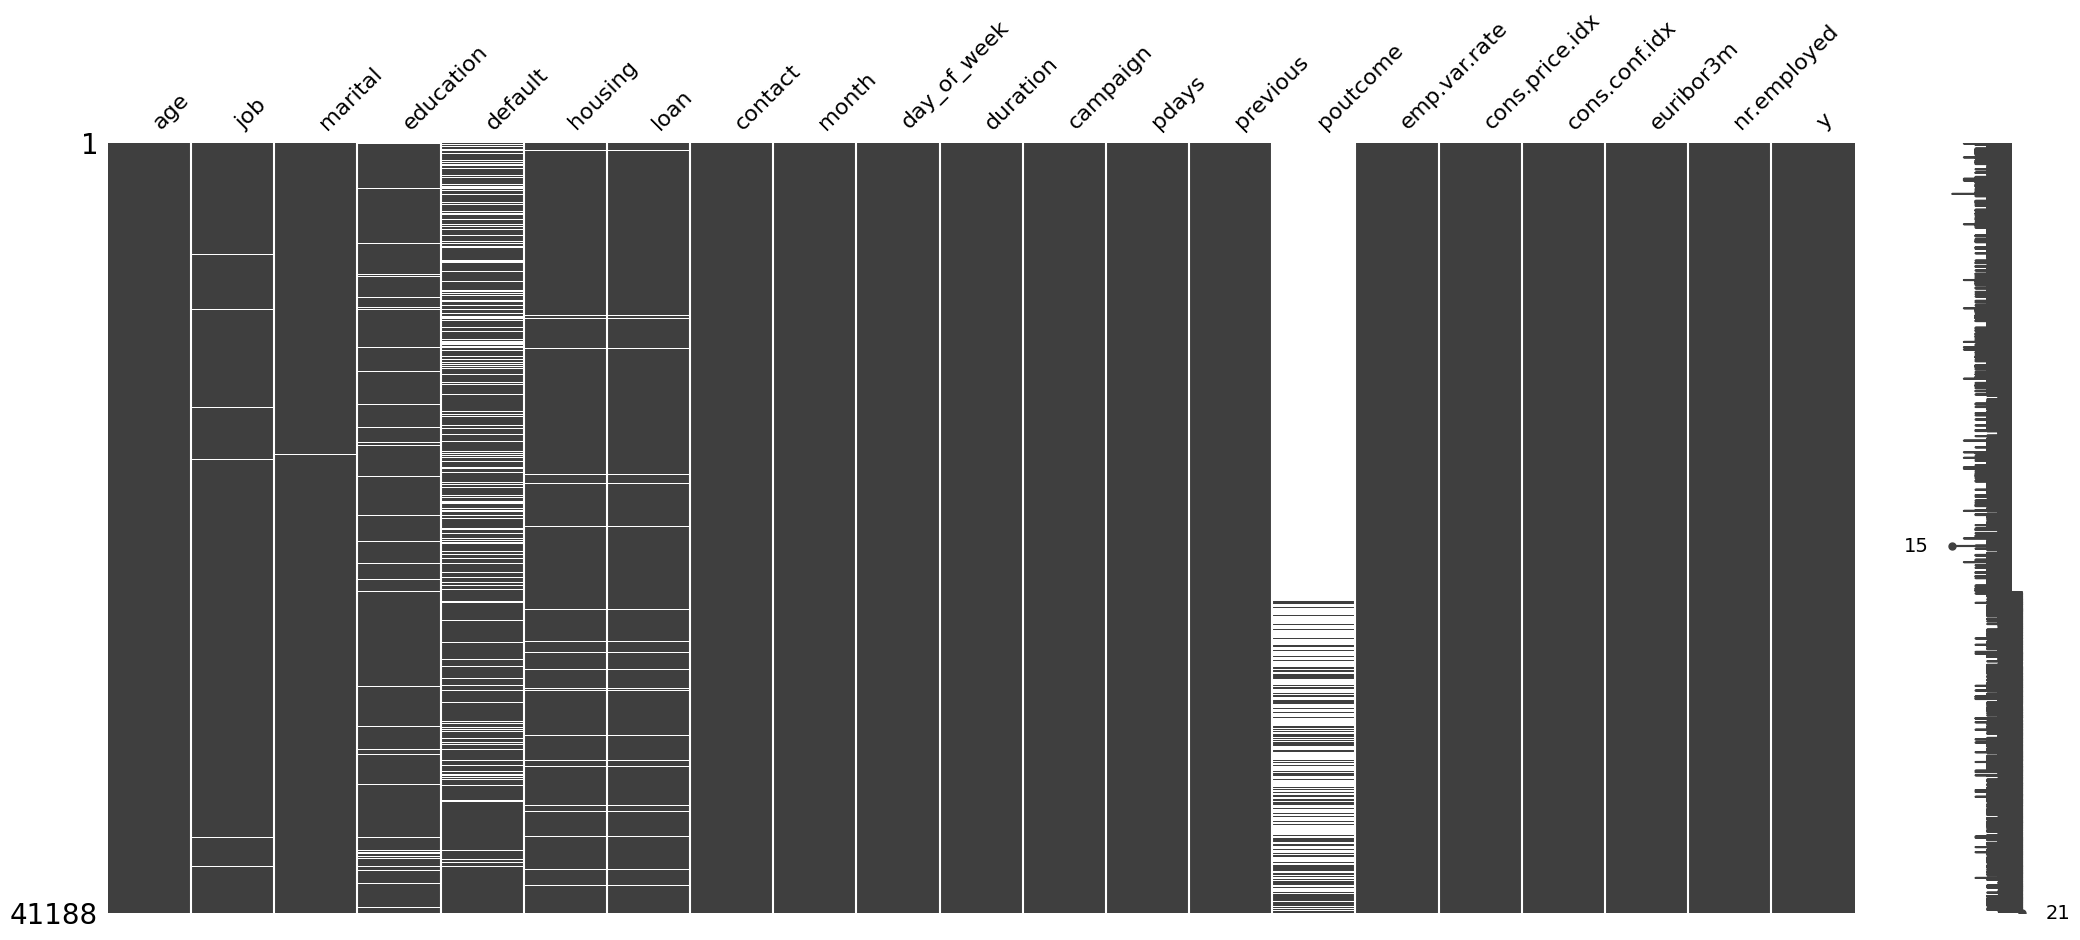

In [20]:
msno.matrix(df)

In [21]:
faltantes = df.isna().mean() * 100
faltantes[faltantes > 0]

job           0.801204
marital       0.194231
education     4.202680
default      20.872584
housing       2.403613
loan          2.403613
poutcome     86.343110
dtype: float64

#### Observamos que las columnas "Housing y Loan " estan correlacionadas a la hora de faltar datos, aplicamos los metidos mnar, mar, mcar, para saber porque puden faltar estos datos 
#### A su vez , en la columna "poutcmome " el porcentaje de datos faltantes es muy elevado como para podr extraer caracteristicas del la misma, sin embargo con la columna "default" se hara #### una imputacion del 20% de datos faltantes 

# mnar, mar, mcar...

In [26]:
df[df['housing'].isna()].mean()
df[df['housing'].notna()].mean()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
imputer = MissForest(categorical=['FLATLOCATIONID','FLOORCLEAN'])
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

# Visualizamos los valores faltantes como una matriz


# Valores faltantes

In [ ]:

df.value_counts()

age  job      marital  education    default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
94   retired  married  basic.9y     no       no       no    cellular   nov    wed          134       1         999    1         failure   -3.4          92.649          -30.1          0.716      5017.5       no     1
17   student  single   basic.9y     no       yes      no    cellular   aug    fri          92        3         4      2         success   -2.9          92.201          -31.4          0.869      5076.2       no     1
                                                                                           182       2         999    2         failure   -2.9          92.201          -31.4          0.869      5076.2       no     1
18   student  single   basic.4y     no       yes      no    telephone  nov    tue          394       1         13     2         success   -1.

# extraccion de caracteristicas 

# Train Test Split 